In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [2]:
# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
# File to Load (Remember to Change These)
mouse_drug_data_to_load = "Pymaceuticals_data_mouse_drug_data.csv"
clinical_trial_data_to_load = "Pymaceuticals_data_clinicaltrial_data.csv"

In [4]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_trial_data = pd.read_csv(clinical_trial_data_to_load)

In [5]:
mouse_drug_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
clinical_trial_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [7]:
clinical_data_complete = pd.merge(mouse_drug_data,clinical_trial_data, how="left", on=["Mouse ID"])
clinical_data_complete["Mean Tumor Volume(mm3)"] = clinical_data_complete["Tumor Volume (mm3)"].mean()
clinical_data_complete.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites,Mean Tumor Volume(mm3)
0,f234,Stelasyn,0,45.000000,0,50.46812
1,f234,Stelasyn,5,47.313491,0,50.46812
2,f234,Stelasyn,10,47.904324,0,50.46812
3,f234,Stelasyn,15,48.735197,1,50.46812
4,f234,Stelasyn,20,51.112713,2,50.46812


In [8]:
 # Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
drug_data = clinical_data_complete[["Drug","Timepoint","Tumor Volume (mm3)"]]

In [9]:
drug_data_group  = drug_data.groupby(["Drug","Timepoint"])
drug_data_group.mean()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325
...                                 ...
Zoniferol 25                  55.432935
          30                  57.713531
          35                  60.089372
          40                  62.916692
          45                  65.960888

[100 rows x 1 columns]

In [10]:
 # Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
for volumen in clinical_data_complete:
    standar_error_tumar = drug_data_group.sem()
    
# Convert to DataFrame
# Preview DataFrame    
standar_error_tumar.head(20)
#type(standar_error_tumar

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731
          25                   0.881642
          30                   0.934460
          35                   1.052241
          40                   1.223608
          45                   1.223977
Ceftamin  0                    0.000000
          5                    0.164505
          10                   0.236144
          15                   0.332053
          20                   0.359482
          25                   0.439356
          30                   0.490620
          35                   0.692248
          40                   0.708505
          45                   0.902358

In [11]:
# Minor Data Munging to Re-Format the Data Frames
drug_data_reformat = drug_data.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
drug_data_reformat

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
#Create a dataframe by each treatment:
#Capomulin:
Capomulin_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Capomulin"]
Capomulin_tumor_volume = Capomulin_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Capomulin_tumor_volume_reformat = Capomulin_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Capomulin_tumor_volume_reformat["Mean"] = Capomulin_tumor_volume_reformat.mean(axis=1)

#Ceftamin
Ceftamin_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ceftamin"]
Ceftamin_tumor_volume = Ceftamin_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Ceftamin_tumor_volume_reformat = Ceftamin_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Ceftamin_tumor_volume_reformat["Mean"] = Ceftamin_tumor_volume_reformat.mean(axis=1)

#Infubinol
Infubinol_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Infubinol"]
Infubinol_tumor_volume = Infubinol_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Infubinol_tumor_volume_reformat = Infubinol_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Infubinol_tumor_volume_reformat["Mean"] = Infubinol_tumor_volume_reformat.mean(axis=1)

#Ketapril
Ketapril_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ketapril"]
Ketapril_tumor_volume = Ketapril_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Ketapril_tumor_volume_reformat = Ketapril_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Ketapril_tumor_volume_reformat["Mean"] = Ketapril_tumor_volume_reformat.mean(axis=1)

#Naftisol
Naftisol_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Naftisol"]
Naftisol_tumor_volume = Naftisol_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Naftisol_tumor_volume_reformat = Naftisol_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Naftisol_tumor_volume_reformat["Mean"] = Naftisol_tumor_volume_reformat.mean(axis=1)

#Placebo
Placebo_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Placebo"]
Placebo_tumor_volume = Placebo_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Placebo_tumor_volume_reformat = Placebo_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Placebo_tumor_volume_reformat["Mean"] = Placebo_tumor_volume_reformat.mean(axis=1)

#Propriva
Propriva_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Propriva"]
Propriva_tumor_volume = Propriva_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Propriva_tumor_volume_reformat = Propriva_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Propriva_tumor_volume_reformat["Mean"] = Propriva_tumor_volume_reformat.mean(axis=1)

#Ramicane
Ramicane_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Ramicane"]
Ramicane_tumor_volume = Ramicane_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Ramicane_tumor_volume_reformat = Ramicane_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Ramicane_tumor_volume_reformat["Mean"] = Ramicane_tumor_volume_reformat.mean(axis=1)

#stelasyn
stelasyn_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Stelasyn"]
stelasyn_tumor_volume = stelasyn_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
stelasyn_tumor_volume_reformat = stelasyn_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
stelasyn_tumor_volume_reformat["Mean"] = stelasyn_tumor_volume_reformat.mean(axis=1)

#Zoniferol
Zoniferol_tumor_volume=clinical_data_complete.loc[clinical_data_complete["Drug"]=="Zoniferol"]
Zoniferol_tumor_volume = Zoniferol_tumor_volume[["Drug","Timepoint","Tumor Volume (mm3)"]]
Zoniferol_tumor_volume_reformat = Zoniferol_tumor_volume.pivot_table("Tumor Volume (mm3)", ["Timepoint"], "Drug")
Zoniferol_tumor_volume_reformat["Mean"] = Zoniferol_tumor_volume_reformat.mean(axis=1)

In [13]:
Placebo_tumor_volume_reformat

Drug,Placebo,Mean
Timepoint,,
0,45.000000,45.000000
5,47.125589,47.125589
10,49.423329,49.423329
15,51.359742,51.359742
20,54.364417,54.364417
25,57.482574,57.482574
30,59.809063,59.809063
35,62.420615,62.420615
40,65.052675,65.052675


In [14]:
# Create a bunch of samples, each with sample size of 5
nsamples = 10
div = 5
samples_Capomulin = [Capomulin_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Ceftamin = [Ceftamin_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Infubinol = [Infubinol_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Ketapril = [Ketapril_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Naftisol = [Naftisol_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Placebo = [Placebo_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Propriva = [Propriva_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Ramicane = [Ramicane_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_stelasyn = [stelasyn_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]
samples_Zoniferol = [Zoniferol_tumor_volume_reformat.sample(div) for x in range(0,nsamples)]

In [15]:
 # Calculate means
means_Capomulin = [s.Mean.mean() for s in samples_Capomulin]
means_Ceftamin = [s.Mean.mean() for s in samples_Ceftamin]
means_Infubinol = [s.Mean.mean() for s in samples_Infubinol]
means_Ketapril = [s.Mean.mean() for s in samples_Ketapril]
means_Naftisol = [s.Mean.mean() for s in samples_Naftisol]
means_Placebo = [s.Mean.mean() for s in samples_Placebo]
means_Propriva = [s.Mean.mean() for s in samples_Propriva]
means_Ramicane = [s.Mean.mean() for s in samples_Ramicane]
means_stelasyn = [s.Mean.mean() for s in samples_stelasyn]
means_Zoniferol = [s.Mean.mean() for s in samples_Zoniferol]

# Calculate standard error on means
sems_Capomulin = [sem(s.Mean) for s in samples_Capomulin]
sems_Ceftamin = [sem(s.Mean) for s in samples_Ceftamin]
sems_Infubinol = [sem(s.Mean) for s in samples_Infubinol]
sems_Ketapril = [sem(s.Mean) for s in samples_Ketapril]
sems_Naftisol = [sem(s.Mean) for s in samples_Naftisol]
sems_Placebo = [sem(s.Mean) for s in samples_Placebo]
sems_Propriva = [sem(s.Mean) for s in samples_Propriva]
sems_Ramicane = [sem(s.Mean) for s in samples_Ramicane]
sems_stelasyn = [sem(s.Mean) for s in samples_stelasyn]
sems_Zoniferol = [sem(s.Mean) for s in samples_Zoniferol]

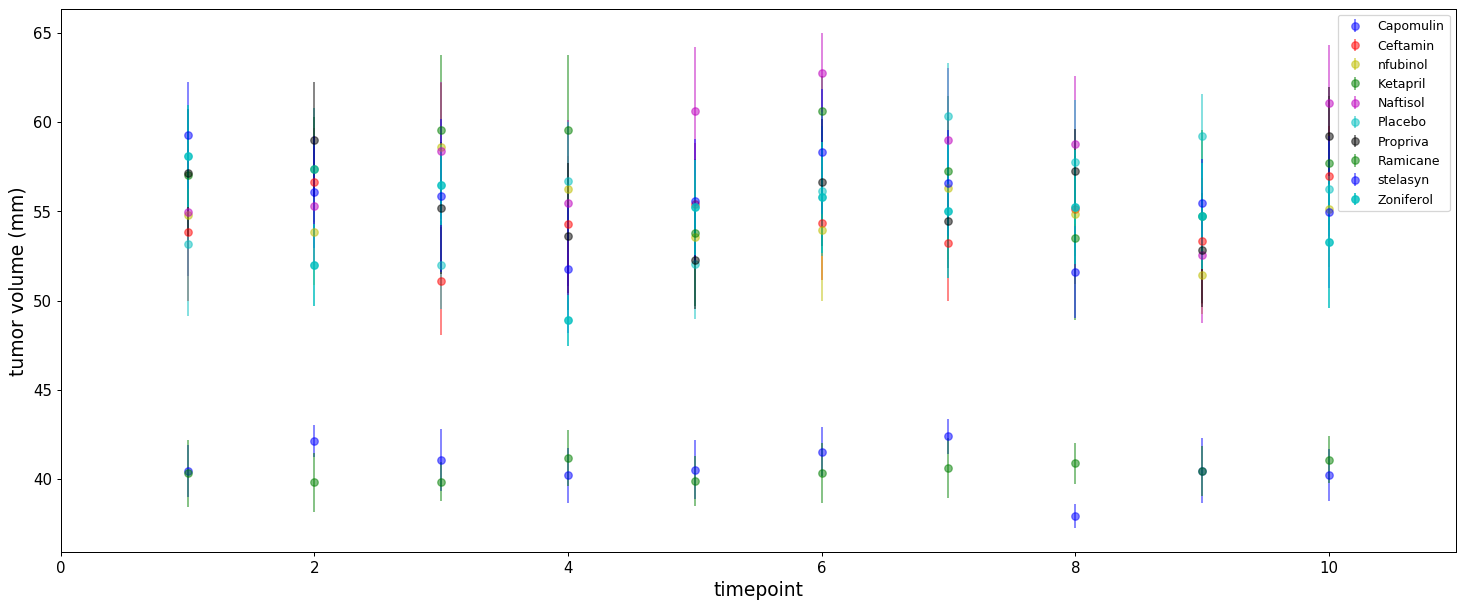

In [55]:
# Plot sample means with error bars
fig, ax = plt.subplots(figsize=(20, 8), dpi=90)

ax.errorbar(np.arange(0, len(samples_Capomulin), 1)+1,means_Capomulin, yerr=sems_Capomulin, fmt="o", color="b",
            alpha=0.5, label="Capomulin")
ax.set_xlim(0, len(means_Capomulin)+1)

ax.errorbar(np.arange(0, len(samples_Ceftamin), 1)+1,means_Ceftamin, yerr=sems_Ceftamin, fmt="o", color="r",
            alpha=0.5, label="Ceftamin")
ax.set_xlim(0, len(means_Ceftamin)+1)

ax.errorbar(np.arange(0, len(samples_Infubinol), 1)+1,means_Infubinol, yerr=sems_Infubinol, fmt="o", color="y",
            alpha=0.5, label="nfubinol")
ax.set_xlim(0, len(means_Infubinol)+1)

ax.errorbar(np.arange(0, len(samples_Ketapril), 1)+1,means_Ketapril, yerr=sems_Ketapril, fmt="o", color="g",
            alpha=0.5, label="Ketapril")
ax.set_xlim(0, len(means_Ketapril)+1)

ax.errorbar(np.arange(0, len(samples_Naftisol), 1)+1,means_Naftisol, yerr=sems_Naftisol, fmt="o", color="m",
            alpha=0.5, label="Naftisol")
ax.set_xlim(0, len(means_Naftisol)+1)

ax.errorbar(np.arange(0, len(samples_Placebo), 1)+1,means_Placebo, yerr=sems_Placebo, fmt="o", color="c",
            alpha=0.5, label="Placebo")
ax.set_xlim(0, len(means_Placebo)+1)

ax.errorbar(np.arange(0, len(samples_Propriva), 1)+1,means_Propriva, yerr=sems_Propriva, fmt="o", color="k",
            alpha=0.5, label="Propriva")
ax.set_xlim(0, len(means_Propriva)+1)

ax.errorbar(np.arange(0, len(samples_Ramicane), 1)+1,means_Ramicane, yerr=sems_Ramicane, fmt="o", color="g",
            alpha=0.5, label="Ramicane")
ax.set_xlim(0, len(means_Ramicane)+1)

ax.errorbar(np.arange(0, len(samples_stelasyn), 1)+1,means_stelasyn, yerr=sems_stelasyn, fmt="o", color="b",
            alpha=0.5, label="stelasyn")
ax.set_xlim(0, len(means_stelasyn)+1)

ax.errorbar(np.arange(0, len(samples_Zoniferol), 1)+1,means_Zoniferol, yerr=sems_Zoniferol, fmt="o", color="c",
            alpha=0.8, label="Zoniferol")
ax.set_xlim(0, len(means_Zoniferol)+1)


plt.xticks(fontsize=12 )
plt.yticks(fontsize=12 )
ax.set_xlabel("timepoint",fontsize=15)
ax.set_ylabel("tumor volume (mm)",fontsize=15)
plt.legend(loc="best", fontsize="medium", fancybox=True)


                 
plt.show()

